# **Support Vector Regression (SVR)**
<hr>
Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points.

You should use SVR if a linear model like linear regression doesn’t fit very well your data. This would mean you are dealing with a non linear problem, where your data is not linearly distributed. Therefore in that case SVR could be a much better solution.

- **Advantages:**
    1. It is robust to outliers (it is not biased)
    2. Decision model can be easily updated
    3. It has excellent generalization capability, with high prediction accuracy
    4. Its implementation is easy
    5. Works very well on non-linear problems
    
- **Disadvantages:**
    1. They are not suitable for large datasets
    2. In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform
    3. The decision model does not perform very well when the dataset has more noise i.e. target class are overlapping
    4. **Compulsory to apply feature scaling**
    
![](https://i.imgur.com/Hu8kCOR.png)

**In the implementation, we have to minimize the bellow function**

$$
\frac{1}{2} ||w||^2 + C \sum_{i=1}^m (\xi_i + \xi_i^*)
$$


**How about the non-linear SVR?**

![](https://i.imgur.com/2sZLHQF.png)

## **Importing the libraries**
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Importing the dataset**
<hr>

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


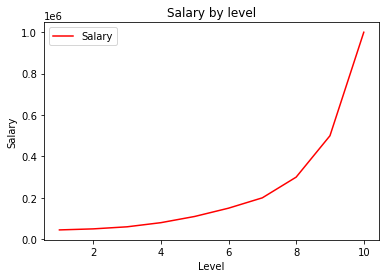

In [3]:
df.plot(x="Level", y="Salary", color="red")
plt.title("Salary by level")
plt.ylabel("Salary")
plt.show()

In [4]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Before apply features scaling we have to reshape our dependent variable since the `StandardScaler` object expects a 2D array.

In [7]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## **Feature Scaling**
<hr>

When we use the SVR Algorithm, it's a must to use feature scaling. Once that there isn't an explicit equation of the dependent variable with respect to the features. Moreover, there aren't those coefficients multiplying each of the features and therefore not compensating with lower values of the features taking high values.

Depending on the range values, if not between -3 and 3 (binary values included), we have to apply the scaling feature in the dependent variable too. In this case, we have to apply the scaling feature to "Salary" (our dependent variable) to avoid that it be neglected.**Pay attention, when we apply feature scaling independent variable, we have to back to normal with the values that will be predict.**

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


The SVR Model expects the dependent variable in the format of 1D array

In [11]:
y = y.reshape(len(y), )
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

## **Training the SVR model on the whole dataset**
<hr>

In [12]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf") #kernel = radial basis function (most used)
regressor.fit(X, y)

SVR()

## **Predicting a new result**
<hr>

In [13]:
#first we have to apply the train data scale
y_pred = regressor.predict(sc_X.transform([[6.5]])) 
y_pred

array([-0.27861589])

In [14]:
#after predict, we have to do the inverse transform
y_pred = sc_y.inverse_transform(y_pred) 
y_pred

array([170370.0204065])

## **Visualising the SVR results**
<hr>

[]

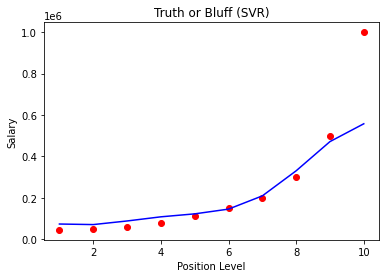

In [15]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color="blue")
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.plot()

## **Visualising the SVR results and Epsilon tube (for higher resolution and smoother curve)**
<hr>

[]

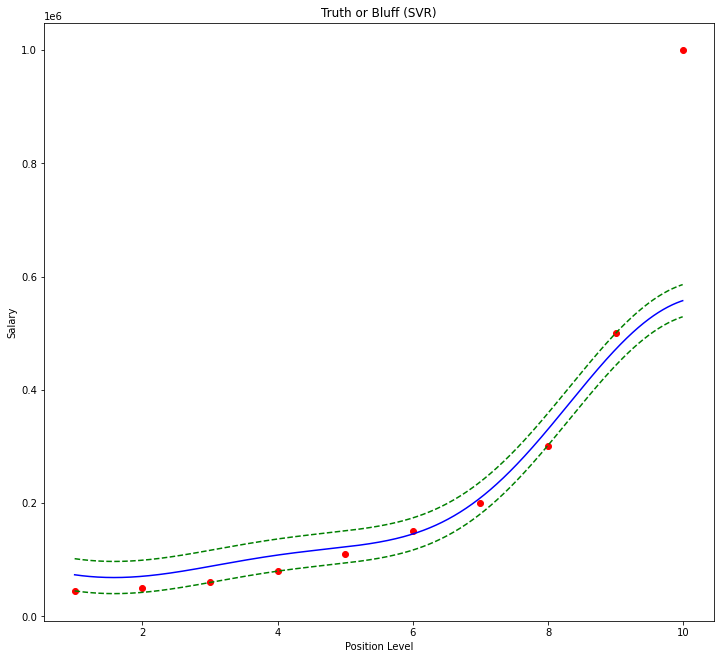

In [16]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.figure(figsize=(12,11))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color="blue")
plt.plot(X_grid, sc_y.inverse_transform(regressor.epsilon + regressor.predict(sc_X.transform(X_grid))), color="green", linestyle="dashed")
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))-regressor.epsilon), color="green", linestyle="dashed")

plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.plot()